In [47]:
import pandas as pd
import numpy as np
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from  sklearn import datasets, manifold
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


In [48]:
df = pd.read_csv("/home/hadiii/python3/cars_clus.csv")
df = df.replace('$null$', np.nan)

num_cols = [
    'sales', 'resale', 'price', 'engine_s', 'horsepow',
    'wheelbas', 'width', 'length', 'curb_wgt',
    'fuel_cap', 'mpg'
]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df = df.dropna()

X = df[num_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


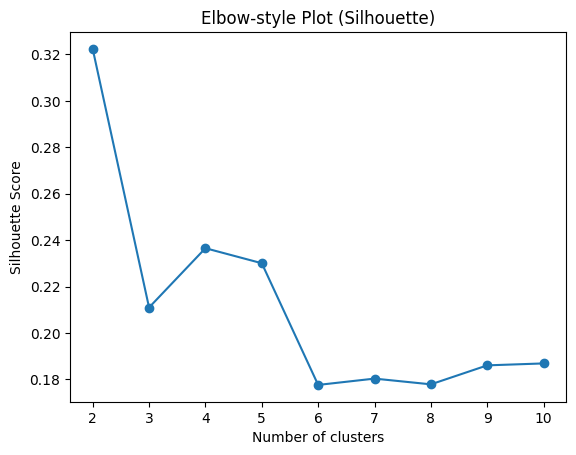

In [49]:
sil_scores = []
K = range(2, 11)

for k in K:
    model = AgglomerativeClustering(
        n_clusters=k,
        linkage='ward'
    )
    labels = model.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

plt.figure()
plt.plot(K, sil_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Elbow-style Plot (Silhouette)")
plt.show()


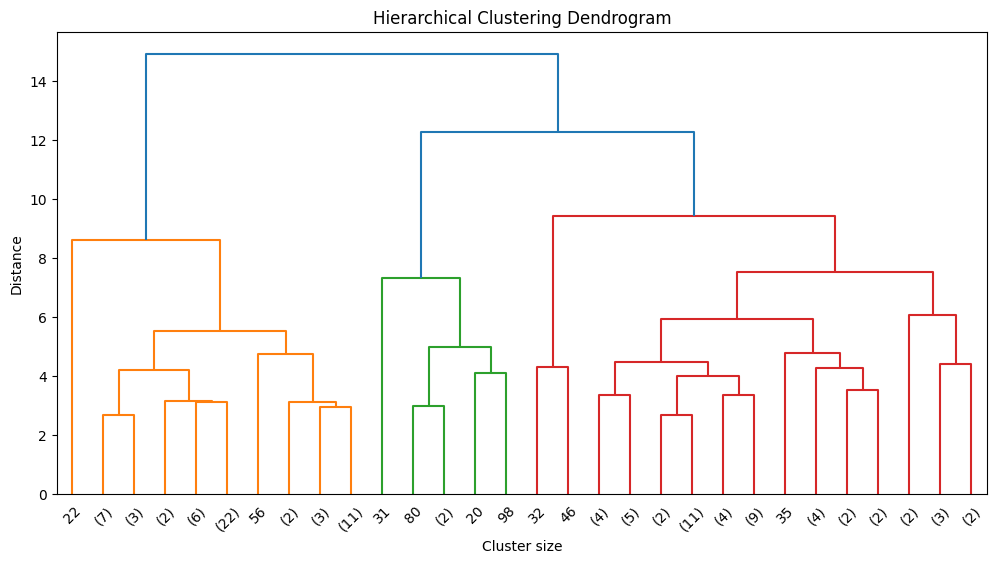

In [62]:
Z = linkage(X_scaled, method='complete')

plt.figure(figsize=(12, 6))
dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=45.,
    leaf_font_size=10.
)
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


In [68]:
k = 3

hc = AgglomerativeClustering(
    n_clusters=k,
    linkage='ward'
)

df['cluster'] = hc.fit_predict(X_scaled)
print(df[['manufact', 'model', 'price', 'horsepow', 'mpg', 'cluster']].head(10))
print(df['cluster'].value_counts())


   manufact    model   price  horsepow   mpg  cluster
0     Acura  Integra  21.500     140.0  28.0        2
1     Acura       TL  28.400     225.0  25.0        1
3     Acura       RL  42.000     210.0  22.0        1
4      Audi       A4  23.990     150.0  27.0        1
5      Audi       A6  33.950     200.0  22.0        0
6      Audi       A8  62.000     310.0  21.0        0
8       BMW     328i  33.400     193.0  24.0        1
9       BMW     528i  38.900     193.0  24.8        1
10    Buick  Century  21.975     175.0  25.0        1
11    Buick    Regal  25.300     240.0  23.0        1
cluster
1    62
0    32
2    23
Name: count, dtype: int64


In [69]:
cluster_summary = df.groupby('cluster')[num_cols].mean().round(2)
print(cluster_summary)


         sales  resale  price  engine_s  horsepow  wheelbas  width  length  \
cluster                                                                      
0        61.68   26.31  38.07      4.08    234.22    113.95  75.22  199.23   
1        59.13   16.62  24.16      2.95    177.76    106.62  70.48  187.74   
2        55.48   10.31  14.01      1.88    117.13    100.03  67.51  171.63   

         curb_wgt  fuel_cap    mpg  
cluster                             
0            3.91     21.53  20.56  
1            3.32     17.58  23.84  
2            2.52     13.27  29.83  


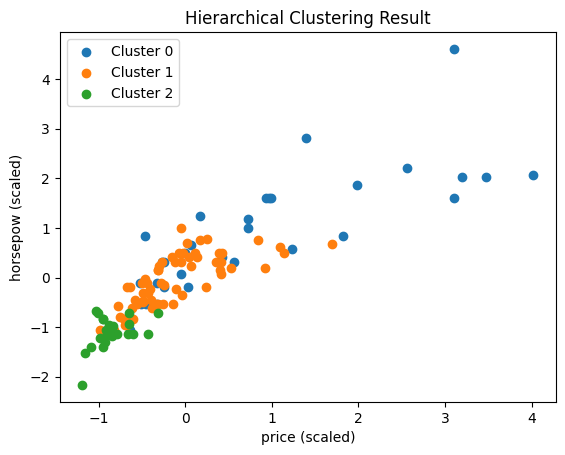

In [70]:
plt.figure()

for c in range(k):
    plt.scatter(
        X_scaled[df['cluster'] == c, num_cols.index('price')],
        X_scaled[df['cluster'] == c, num_cols.index('horsepow')],
        label=f'Cluster {c}'
    )

plt.xlabel("price (scaled)")
plt.ylabel("horsepow (scaled)")
plt.title("Hierarchical Clustering Result")
plt.legend()
plt.show()
